In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from skfeature.function.similarity_based import fisher_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [33]:
df = pd.read_csv('L0001.csv')
df.fillna(0, inplace=True, axis=1)

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def randForest(X, y):
    
    
    if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.Series):
        raise ValueError("X should be a pandas DataFrame and y should be a pandas Series")
    
    #random forest regressor
    model = RandomForestRegressor()
    
    #fit model
    model.fit(X, y)
    
    importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    correlation = X.corrwith(y).abs().sort_values(ascending=False)
    
    #put info into a df
    importance_df = pd.DataFrame({'Correlation': correlation, 'Importance': importance}).fillna(0) 
    
    #sort
    importance_df['Combined'] = importance_df['Correlation'] + importance_df['Importance']
    importance_df = importance_df.sort_values(by='Correlation', ascending=False)
    
    return importance_df

#IMPORTANCE
# Refers to the degree of usefulness of each input feature in a models decision making process 
    
#remove when variable is 0
    #run 1 normal and 1 with no 0's
    #drop columns that arent important houghtrans, skimages (not a), boundary
    #compare skiimage-a to hough-a, generate a plot

    #train model based on feature selection



df.head()

#SORTED BY CORRELATION

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.0,100.0,2.0,7750.0,0.009,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
1,-5.91,16.0,100.0,2.0,7760.0,0.009,0.0,127.0,14400.0,12.716187,...,6.324555,2.574863,41.231056,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
2,-5.82,16.0,100.0,2.0,7770.0,0.009,0.0,174.0,14400.0,14.884343,...,6.000000,1.570796,48.000000,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
3,-5.73,16.0,100.0,2.0,7780.0,0.009,0.0,195.0,14400.0,15.756958,...,6.324555,2.976444,57.706152,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
4,-5.64,16.0,100.0,2.0,7790.0,0.009,0.0,201.0,14400.0,15.997536,...,6.000000,1.570796,60.000000,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111


In [35]:
randForest(df, df['HoughTransform-a'])

C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,Importance,Combined
HoughTransform-a,1.000000,8.671736e-01,1.867174
SKImage-a,0.955196,5.709215e-03,0.960905
SKImage-eqDiameter,0.912806,9.927159e-03,0.922733
MPArea,0.910323,8.509809e-03,0.918833
SKImage-b,0.726590,2.164960e-02,0.748239
boundary,0.640932,2.179909e-08,0.640932
HoughTransform-fitness,0.616446,1.003851e-02,0.626484
ImageSize,0.592373,8.571586e-03,0.600945
HoughTransform-x0,0.590058,1.284062e-02,0.602899
SKImage-x0,0.587477,2.127414e-02,0.608751


In [36]:
df = df[df['HoughTransform-a'] > 0]
randForest(df, df['HoughTransform-a'])

C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,Importance,Combined
HoughTransform-a,1.000000,9.996190e-01,1.999619
SKImage-a,0.930374,3.260549e-05,0.930407
MPArea,0.877562,3.226352e-05,0.877595
SKImage-eqDiameter,0.875463,1.169152e-05,0.875475
P,0.548208,1.532239e-09,0.548208
boundary,0.548208,1.373085e-07,0.548209
powerDensity,0.548206,2.589109e-08,0.548206
invVelocity,0.548179,2.108821e-08,0.548179
velocity,0.548175,3.032006e-07,0.548176
SKImage-b,0.522357,2.308154e-05,0.522380


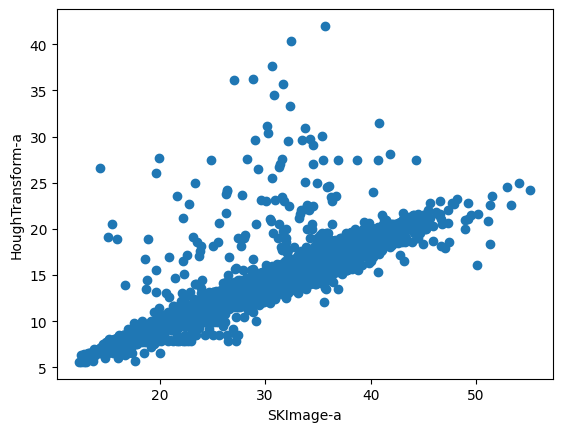

In [37]:
plt.scatter(df['SKImage-a'], df['HoughTransform-a'])
plt.xlabel('SKImage-a')
plt.ylabel('HoughTransform-a')
plt.show()

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def randForest(X, y):
    
    
    if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.Series):
        raise ValueError("X should be a pandas DataFrame and y should be a pandas Series")
    
    #random forest regressor
    model = RandomForestRegressor()
    
    #fit model
    model.fit(X, y)
    
    importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    correlation = X.corrwith(y).abs().sort_values(ascending=False)
    
    #put info into a df
    importance_df = pd.DataFrame({'Correlation': correlation, 'Importance': importance}).fillna(0) 

    #sort
    importance_df['Combined'] = importance_df['Correlation'] + importance_df['Importance']
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    return importance_df

#IMPORTANCE
# Refers to the degree of usefulness of each input feature in a models decision making process

#SORTED BY IMPORTANCE

In [39]:
randForest(df, df['HoughTransform-a'])

C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,Importance,Combined
HoughTransform-a,1.000000,9.994038e-01,1.999404
HoughTransform-b,0.040641,1.481627e-04,0.040789
HoughTransform-fitness,0.521345,8.543529e-05,0.521431
SKImage-y0,0.047246,5.356946e-05,0.047299
HoughTransform-y0,0.054064,5.248204e-05,0.054116
stepIndex,0.244029,4.145327e-05,0.244070
HoughTransform-angle,0.057513,3.125823e-05,0.057544
SKImage-a,0.930374,2.899423e-05,0.930403
SKImage-x0,0.002255,2.543348e-05,0.002280
x,0.136080,2.368801e-05,0.136103
